In [1]:
# two

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 200,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\AI-lab\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.9629629629629629, Loss: 0.17097464314213506
Checkpoint 200, Accuracy: 0.9691358024691358, Loss: 0.15528293892189307
Checkpoint 300, Accuracy: 0.9629629629629629, Loss: 0.14490136393794306
Checkpoint 400, Accuracy: 0.9629629629629629, Loss: 0.13762933236581307
Checkpoint 500, Accuracy: 0.9629629629629629, Loss: 0.12949053446451822


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 1. 0.] <-> [0.00884481 0.9839632  0.00719197]
[1. 0. 0.] <-> [0.9867278  0.00914993 0.0041223 ]
[0. 1. 0.] <-> [0.08248837 0.91104966 0.006462  ]
[1. 0. 0.] <-> [0.9827708  0.00935502 0.0078743 ]
[1. 0. 0.] <-> [0.9417292  0.02396047 0.03431029]
[1. 0. 0.] <-> [0.97144675 0.00808753 0.02046569]
[1. 0. 0.] <-> [0.9869474  0.00847255 0.00458002]
[1. 0. 0.] <-> [0.98864996 0.00435593 0.00699402]
[1. 0. 0.] <-> [0.98054296 0.01069009 0.00876701]
[1. 0. 0.] <-> [0.98634976 0.00558858 0.0080617 ]
[1. 0. 0.] <-> [0.9878302  0.00696709 0.00520269]
[1. 0. 0.] <-> [0.85557294 0.0192002  0.12522678]
[1. 0. 0.] <-> [0.9679579  0.01371249 0.01832969]
[0. 1. 0.] <-> [0.02122189 0.97463006 0.00414809]
[1. 0. 0.] <-> [0.9851349  0.00693359 0.00793143]
[1. 0. 0.] <-> [0.9604998  0.00725054 0.03224968]
[0. 0. 1.] <-> [0.01054737 0.06032177 0.9291309 ]
[1. 0. 0.] <-> [0.9895783  0.00580574 0.00461587]
[1. 0. 0.] <-> [0.09462027 0.01250764 0.89287204]
[0. 0. 1.] <-> [0.08039642 0.01044691 0.9091567 ]


In [12]:
# Testing Performance

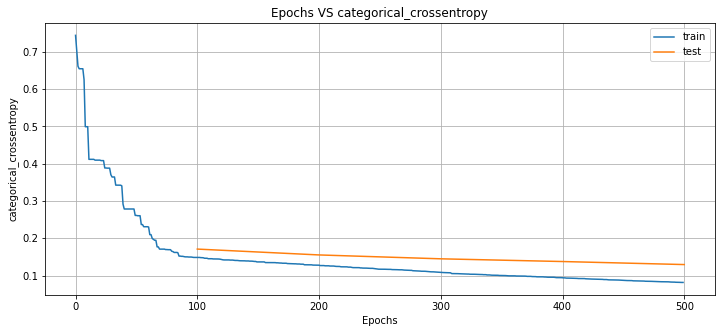

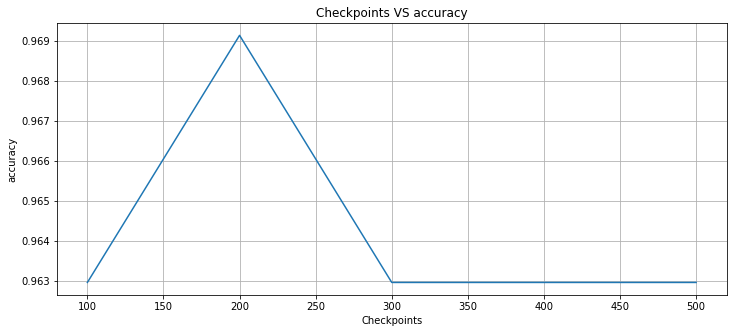

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9629629629629629, 'mean_square_error': 0.08174503655608277, 'categorical_crossentropy': 0.17097464314213506, 'precision': 0.9444444444444444, 'recall': 0.9444444444444444, 'f1': 0.9444444444444444, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 4, 'tn_hit': 24, 'fn_hit': 2}, 1: {'tp_hit': 13, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 2}, 2: {'tp_hit': 11, 'fp_hit': 2, 'tn_hit': 93, 'fn_hit': 2}}, 'checkpoint': 100} 


{'accuracy': 0.9691358024691358, 'mean_square_error': 0.07436331290881824, 'categorical_crossentropy': 0.15528293892189307, 'precision': 0.9537037037037037, 'recall': 0.9537037037037037, 'f1': 0.9537037037037037, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 3, 'tn_hit': 25, 'fn_hit': 2}, 1: {'tp_hit': 14, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 1}, 2: {'tp_hit': 11, 'fp_hit': 2, 'tn_hit': 93, 'fn_hit': 2}}, 'checkpoint': 200} 


{'accuracy': 0.9629629629629629, 'mean_square_error': 0.07150212545088233, 'categorical_crossentropy': 0.14490136393794306, 'preci

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[ 0.3939826  1.2799582 -1.4745009 -2.8832161 -2.4373837]
 bias: -0.18231675028800964

Neuron 1: weights:
[-1.5067551   2.6250615   2.0801396   2.4881759   0.64035946]
 bias: -0.4421449303627014

Neuron 2: weights:
[-1.5360225  2.8528843  1.6685891 -1.4276894 -1.4345173]
 bias: -2.8712985515594482

Neuron 3: weights:
[-1.2373111  2.0172422  2.6915536 -0.9181798 -2.4866211]
 bias: 2.6272709369659424

$
Layer 2
Neuron 0: weights:
[ 1.9638195 -2.4028819 -2.993669   3.       ]
 bias: 0.32301750779151917

Neuron 1: weights:
[0.02786029 1.8358927  2.2605476  0.8790221 ]
 bias: -1.7919816970825195

Neuron 2: weights:
[-1.2943109 -0.4241172 -1.1942707 -2.744509 ]
 bias: 3.0

$

